In [1]:
import sys

sys.path

sys.path.append("/Users/hbuhrmann/PycharmProjects/CycleStats")

sys.path.append("C:/Users/hanne/PycharmProjects/CycleStats")

In [2]:
import sourcetocsv as cycle
import numpy as np
import thinkstats2
import thinkplot
import pandas as pd
import scipy.stats as st

In [3]:

#filepath = '/users/hbuhrmann/PycharmProjects/CycleStats/PowerOutputExperiments/RichmondFinal/'

filepath = 'C:/Users/hanne/PycharmProjects/CycleStats/PowerOutputExperiments/GeneralFinal/'

sourcedf = cycle.getfinalcsvcycledata(filepath,'_reduced_dataset.csv')



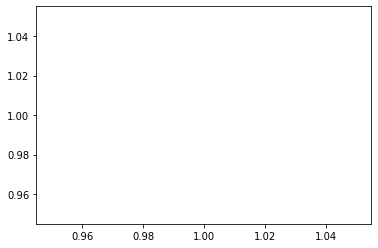

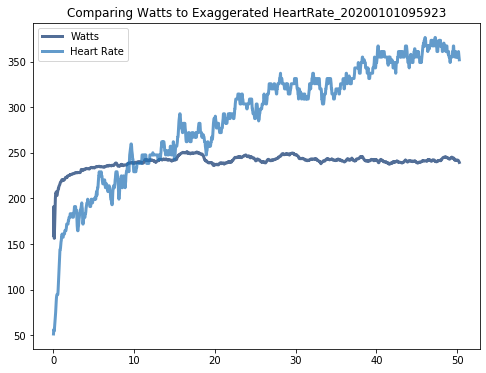

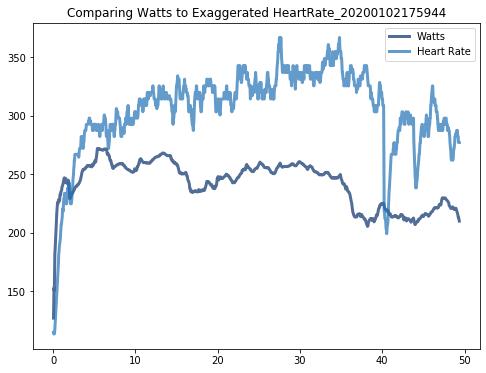

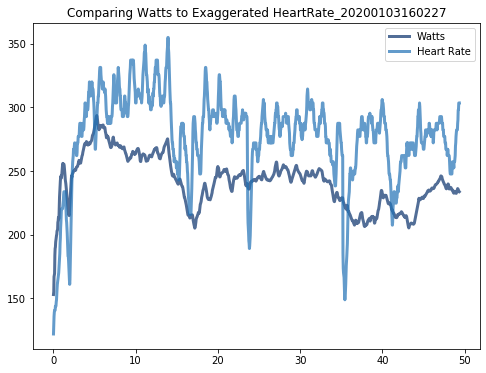

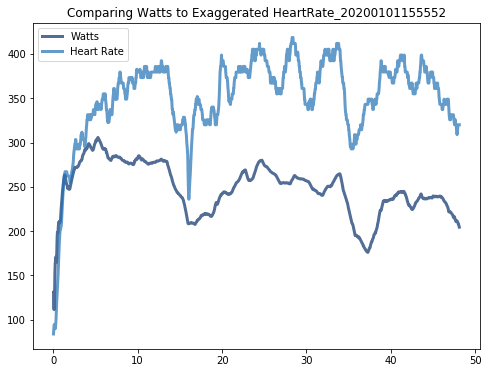

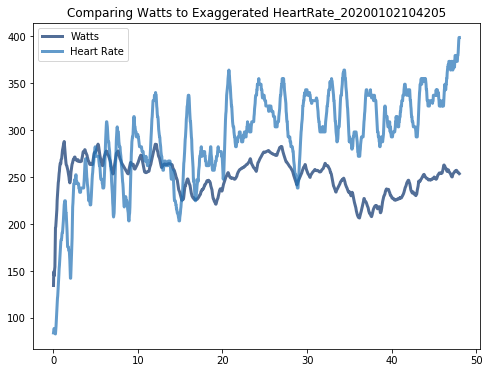

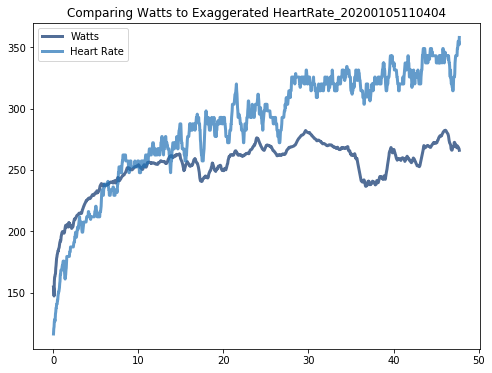

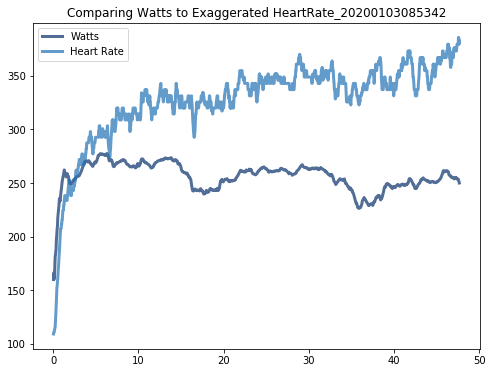

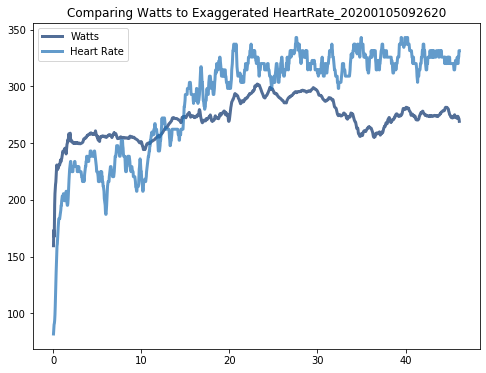

<Figure size 576x432 with 0 Axes>

In [4]:
# plot heartrates
thinkplot.Plot(1,1)
thinkplot.Show()

df2 = sourcedf

for activity,count in df2.ActivityId.value_counts().items():

    if activity == '_20200126092340':
        continue
    
    tempdf = df2[df2.ActivityId == activity]

    thinkplot.Plot(tempdf.ElapasedDuration/1000/60,tempdf.Watts2.rolling(window=100,min_periods=0).mean(),label='Watts')
    thinkplot.Plot(tempdf.ElapasedDuration/1000/60,(tempdf.HeartRate2/25)**3,label='Heart Rate')
    thinkplot.Config(title='Comparing Watts to Exaggerated HeartRate'+activity)
    #thinkplot.Config (xlim=(0,2.25))
    thinkplot.Show()


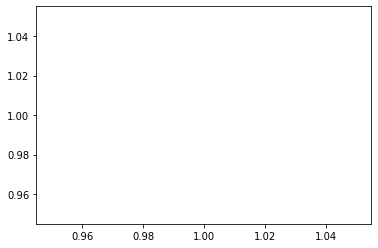

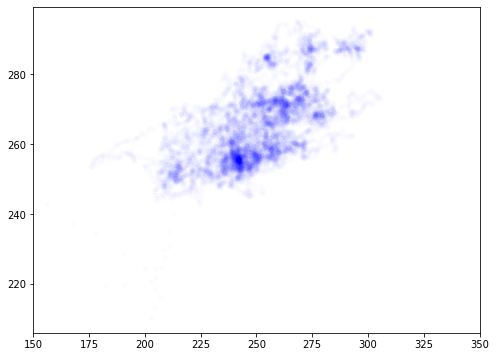

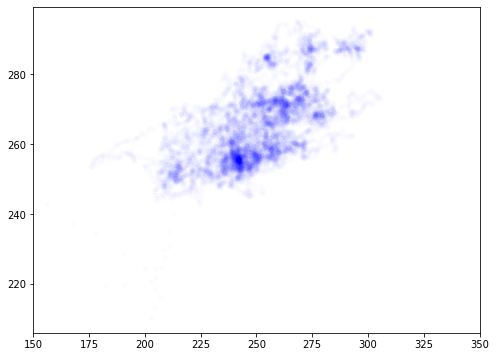

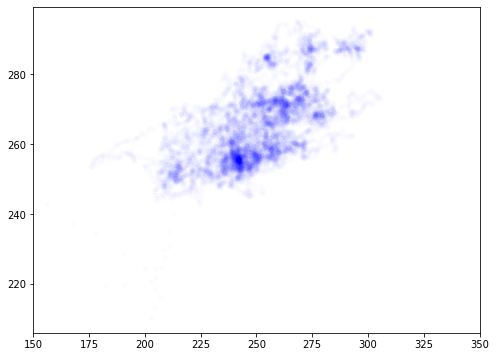

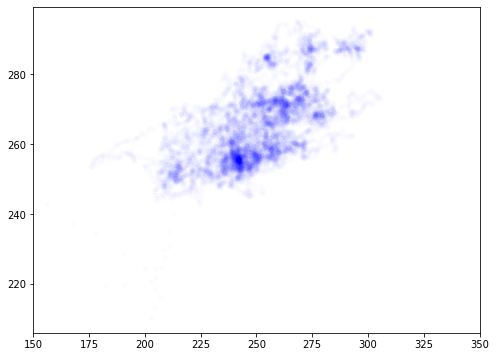

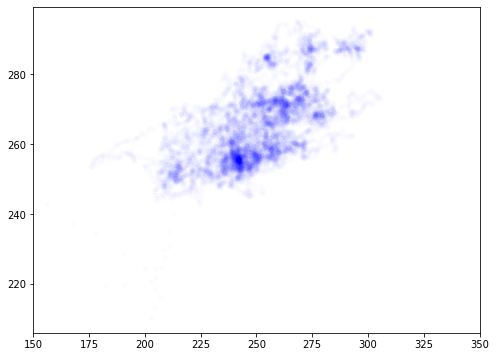

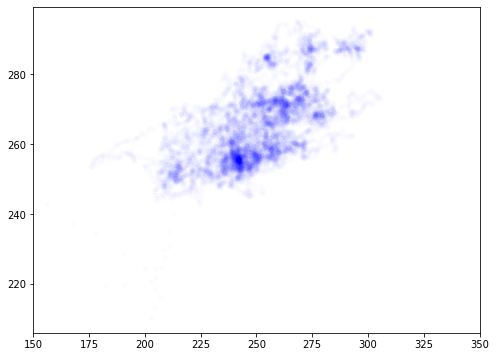

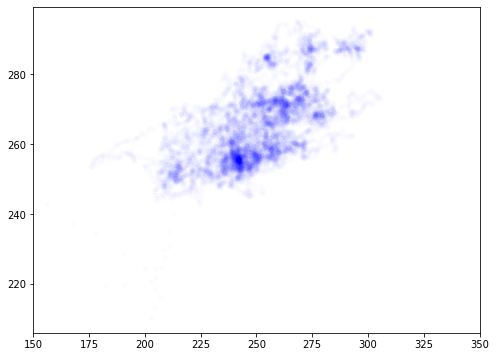

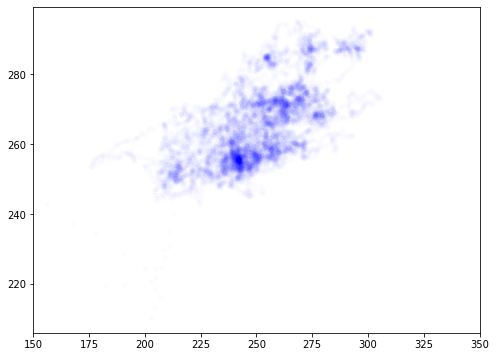

<Figure size 576x432 with 0 Axes>

In [14]:
#Lets see the correllation between calculated power and measured power

# plot 
thinkplot.Plot(1,1)
thinkplot.Show()

df2 = sourcedf
win = 100


for activity,count in df2.ActivityId.value_counts().items():

    tempdf = df2[df2.ActivityId == activity]

    thinkplot.Scatter(xs=df2.Watts2.rolling(window=win,min_periods=0).mean(),ys=df2.SmoothCP2.rolling(window=win,min_periods=0).mean(),alpha=0.01)
    #thinkplot.Config(title='Comparing Watts to HeartRate'+activity)
    thinkplot.Config (xlim=(150,350))
    thinkplot.Show()



In [12]:
winlist = [15,30,50,100,200]

for activity,count in sourcedf.ActivityId.value_counts().items():

    print(f'Activity Id @ {activity}')
    
    tempdf = sourcedf[sourcedf.ActivityId == activity]

    cordf=tempdf[['Watts2','SmoothCP2','CalculatedPower2']].dropna()

    print(f'Comparing Watts2 to Smoothed Calculated Power {st.pearsonr(cordf.Watts2,cordf.SmoothCP2)}')

    for win in winlist:

        cordf['RollingWatts2'] = cordf.Watts2.rolling(window=win,min_periods=0).mean()
        cordf['RollingSmooth2'] = cordf.SmoothCP2.rolling(window=win,min_periods=0).mean()

        print(f'{win}, {np.round(st.pearsonr(cordf.RollingWatts2,cordf.RollingSmooth2),3)}, {np.round(st.spearmanr(cordf.RollingWatts2,cordf.RollingSmooth2),3)}')


Activity Id @ _20200101095923
Comparing Watts2 to Smoothed Calculated Power (0.039156600089515214, 0.12930264422578835)
15, [0.139 0.   ], [0.117 0.   ]
30, [0.26 0.  ], [0.163 0.   ]
50, [0.371 0.   ], [0.218 0.   ]
100, [0.531 0.   ], [0.153 0.   ]
200, [0.621 0.   ], [0.213 0.   ]
Activity Id @ _20200102175944
Comparing Watts2 to Smoothed Calculated Power (0.01723584097631238, 0.5081843201232263)
15, [0.205 0.   ], [0.302 0.   ]
30, [0.327 0.   ], [0.373 0.   ]
50, [0.396 0.   ], [0.399 0.   ]
100, [0.517 0.   ], [0.6 0. ]
200, [0.582 0.   ], [0.796 0.   ]
Activity Id @ _20200103160227
Comparing Watts2 to Smoothed Calculated Power (0.1863044569167176, 5.402364482809945e-13)
15, [0.48 0.  ], [0.532 0.   ]
30, [0.5 0. ], [0.542 0.   ]
50, [0.547 0.   ], [0.553 0.   ]
100, [0.656 0.   ], [0.686 0.   ]
200, [0.699 0.   ], [0.798 0.   ]
Activity Id @ _20200101155552
Comparing Watts2 to Smoothed Calculated Power (0.11191879008462925, 2.0883423414755717e-05)
15, [0.397 0.   ], [0.462 0.   